# Deep Exploratory Data Analysis - Ukrainian ProZorro Dataset

**Purpose:** In-depth analysis of regional patterns, categories, temporal trends, and price anomalies in Ukrainian public procurement (2015-2019).

**Building on:** Initial data exploration from `01_initial_data_exploration.ipynb`

**Analysis Focus:**
1. **Regional Patterns** - Which oblasts/cities have highest anomaly rates
2. **Category Analysis** - CPV codes with problematic patterns
3. **Temporal Trends** - Yearly evolution, seasonal patterns
4. **Price Anomalies** - Initial vs final prices, outliers
5. **Competition Analysis** - Bidder participation patterns
6. **Organizer Analysis** - Which entities show suspicious patterns

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("Libraries loaded successfully")

Libraries loaded successfully


## 1. Load and Prepare Data

Loading datasets and performing initial preprocessing.

In [2]:
# Load datasets
data_dir = Path('../data/raw')

print("Loading datasets...")
df_suppliers = pd.read_csv(data_dir / 'Suppliers.csv', low_memory=False)
df_procurements = pd.read_csv(data_dir / 'Competitive_procurements.csv', low_memory=False)

print(f"✓ Suppliers: {len(df_suppliers):,} rows")
print(f"✓ Procurements: {len(df_procurements):,} rows")

Loading datasets...
✓ Suppliers: 3,621,822 rows
✓ Procurements: 2,313,168 rows


In [3]:
# Display column names for reference
print("Suppliers columns:")
print(df_suppliers.columns.tolist())
print("\nProcurements columns:")
print(df_procurements.columns.tolist())

Suppliers columns:
['lot_announce_date', 'lot_announce_year', 'organizer_name', 'organizer_code', 'organizer_region', 'lot_id', 'lot_procur_type', 'lot_competitiveness', 'lot_cpv', 'lot_cpv_4_digs', 'lot_cpv_2_digs', 'lot_initial_value', 'lot_final_value', 'supplier_name', 'supplier_code', 'supplier_region']

Procurements columns:
['lot_announce_date', 'lot_announce_year', 'organizer_name', 'organizer_code', 'organizer_region', 'lot_id', 'lot_procur_type', 'lot_cpv', 'lot_cpv_4_digs', 'lot_cpv_2_digs', 'lot_initial_value', 'lot_final_value', 'participant_name', 'participant_code', 'participant_region', 'supplier_dummy']


In [4]:
# Parse date columns (adjust column names based on actual data)
# Common date column patterns: 'date', 'tender_date', 'award_date', etc.
date_columns_suppliers = [col for col in df_suppliers.columns if 'date' in col.lower()]
date_columns_procurements = [col for col in df_procurements.columns if 'date' in col.lower()]

print("Date columns in Suppliers:", date_columns_suppliers)
print("Date columns in Procurements:", date_columns_procurements)

# Convert to datetime
for col in date_columns_suppliers[:3]:  # Limit to first 3 date columns
    try:
        df_suppliers[col] = pd.to_datetime(df_suppliers[col], errors='coerce')
        print(f"✓ Converted {col} in Suppliers")
    except:
        print(f"⚠ Failed to convert {col}")

for col in date_columns_procurements[:3]:
    try:
        df_procurements[col] = pd.to_datetime(df_procurements[col], errors='coerce')
        print(f"✓ Converted {col} in Procurements")
    except:
        print(f"⚠ Failed to convert {col}")

Date columns in Suppliers: ['lot_announce_date']
Date columns in Procurements: ['lot_announce_date']
✓ Converted lot_announce_date in Suppliers
✓ Converted lot_announce_date in Procurements


## 2. Regional Analysis

Analyzing procurement patterns by Ukrainian oblasts and cities to identify geographic hotspots of potential corruption.

In [5]:
# Find region/oblast columns
region_cols_suppliers = [col for col in df_suppliers.columns if any(x in col.lower() for x in ['region', 'oblast', 'city', 'area'])]
region_cols_procurements = [col for col in df_procurements.columns if any(x in col.lower() for x in ['region', 'oblast', 'city', 'area'])]

print("Region columns in Suppliers:", region_cols_suppliers)
print("Region columns in Procurements:", region_cols_procurements)

Region columns in Suppliers: ['organizer_region', 'supplier_region']
Region columns in Procurements: ['organizer_region', 'participant_region']



Analyzing regional distribution using: organizer_region

Top 20 regions by tender count:
organizer_region
Kyiv               672354
Dnipropetrovsk     304904
Donetsk            225430
Kharkiv            223980
Odesa              210281
Lviv               156269
Poltava            153652
Zaporizhzhia       143504
Vinnytsia          141528
Zhytomyr           119527
Chernihiv          118531
Khmelnytskyi       117019
Cherkasy           115468
Ivano-Frankivsk    102753
Mykolaiv           101257
Sumy                96442
Rivne               88298
Kherson             87752
Luhansk             84553
Zakarpattia         80877
Name: count, dtype: int64


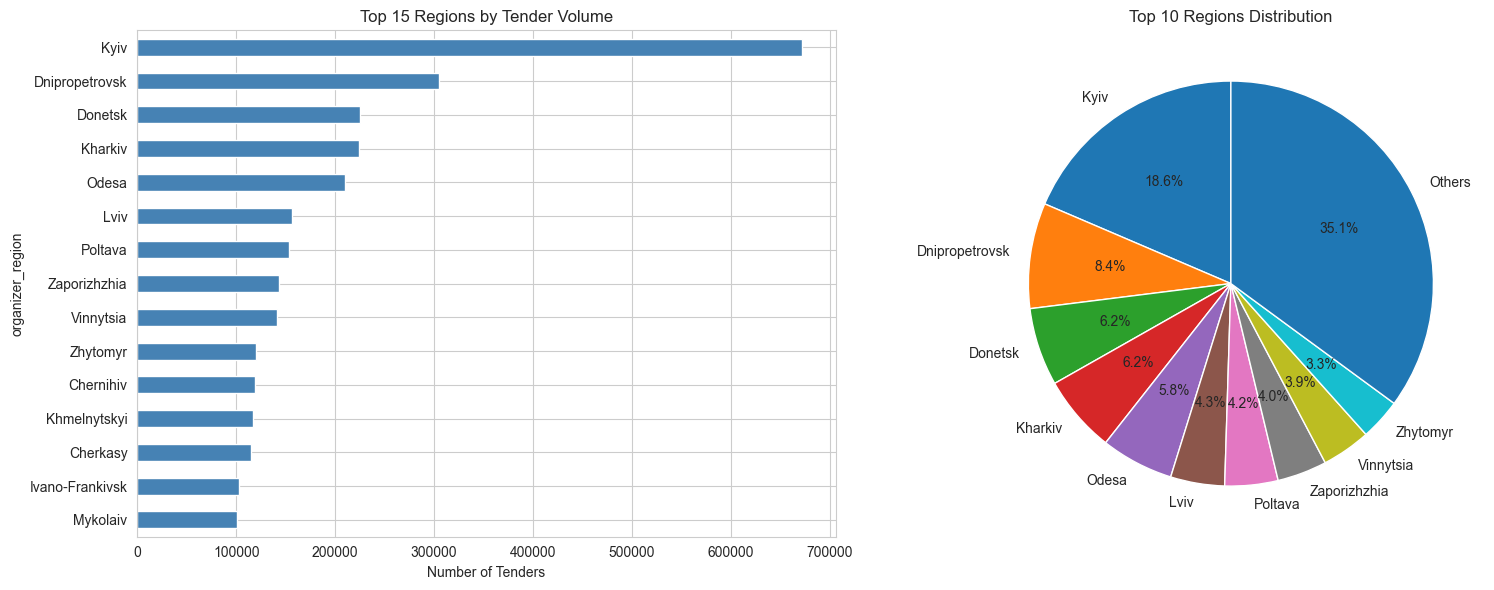


Total unique regions: 25


In [6]:
# Analyze regional distribution in Suppliers dataset
if region_cols_suppliers:
    primary_region_col = region_cols_suppliers[0]
    
    print(f"\nAnalyzing regional distribution using: {primary_region_col}")
    print("="*80)
    
    regional_stats = df_suppliers[primary_region_col].value_counts()
    print(f"\nTop 20 regions by tender count:")
    print(regional_stats.head(20))
    
    # Visualize top regions
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart - Top 15 regions
    regional_stats.head(15).plot(kind='barh', ax=axes[0], color='steelblue')
    axes[0].set_xlabel('Number of Tenders')
    axes[0].set_title(f'Top 15 Regions by Tender Volume')
    axes[0].invert_yaxis()
    
    # Pie chart - Top 10
    top_regions = regional_stats.head(10)
    others = pd.Series({'Others': regional_stats.iloc[10:].sum()})
    pie_data = pd.concat([top_regions, others])
    
    axes[1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Top 10 Regions Distribution')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal unique regions: {df_suppliers[primary_region_col].nunique():,}")
else:
    print("No region columns found. Please check column names.")


Calculating single bidder rate by region...

Top 20 regions by single bidder percentage:
                  Total_Tenders  Avg_Bidders  Median_Bidders  \
organizer_region                                               
Dnipropetrovsk           304904         2.34             2.0   
Vinnytsia                141528         2.18             2.0   
Kyiv                     672354         2.37             2.0   
Donetsk                  225430         2.17             2.0   
Chernihiv                118531         2.22             2.0   
Zaporizhzhia             143504         2.33             2.0   
Zhytomyr                 119527         2.25             2.0   
Volyn                     73044         2.20             2.0   
Lviv                     156269         2.28             2.0   
Sumy                      96442         2.36             2.0   
Mykolaiv                 101257         2.53             2.0   
Ternopil                  66485         2.37             2.0   
Luhansk       

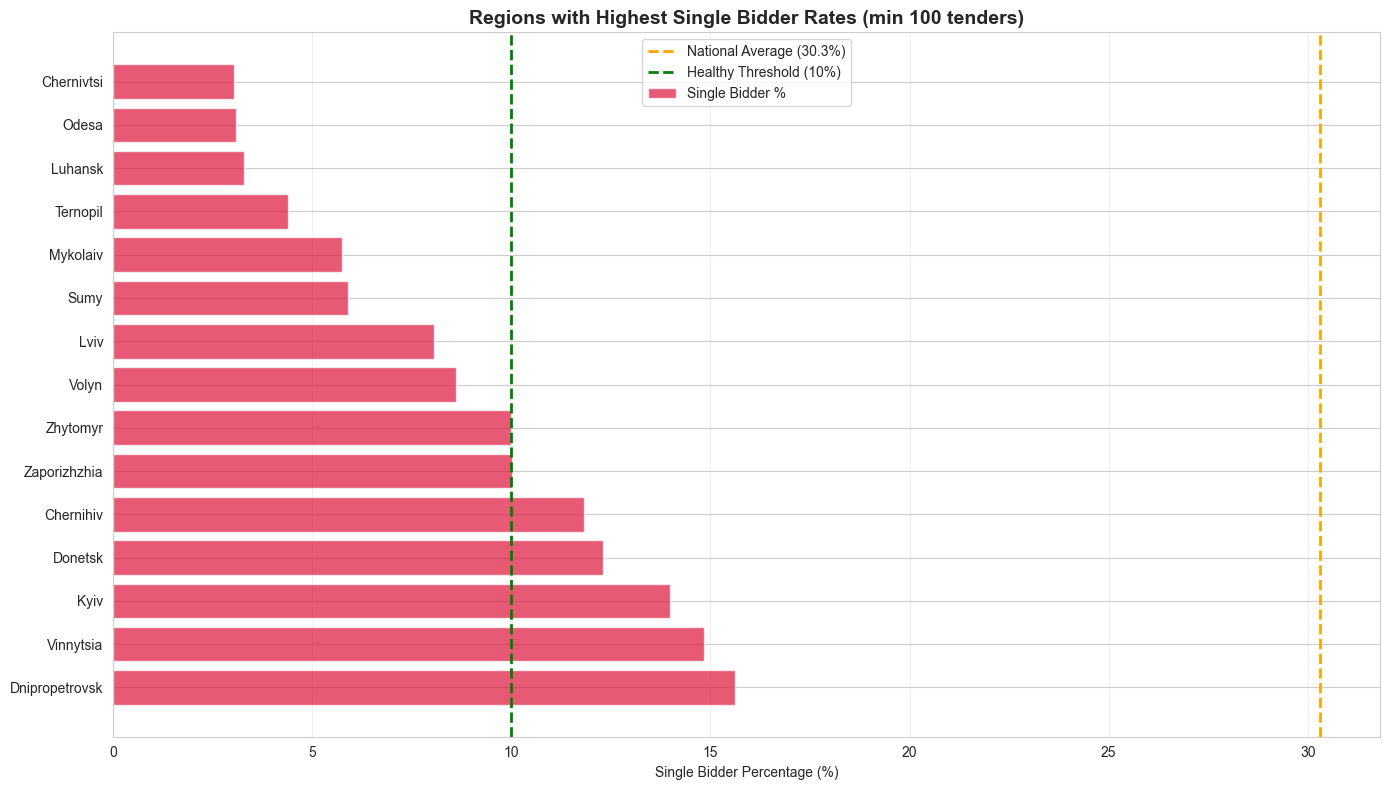

In [7]:
# Calculate single bidder rate by region
if 'lot_id' in df_procurements.columns:
    print("\nCalculating single bidder rate by region...")
    
    # Count bidders per lot
    bidders_per_lot = df_procurements.groupby('lot_id').size().reset_index(name='bidder_count')
    
    # Merge with suppliers to get region info
    if region_cols_suppliers and 'lot_id' in df_suppliers.columns:
        regional_competition = df_suppliers.merge(
            bidders_per_lot,
            on='lot_id',
            how='left'
        )
        
        region_col = region_cols_suppliers[0]
        
        # Calculate metrics by region
        regional_metrics = regional_competition.groupby(region_col).agg({
            'lot_id': 'count',
            'bidder_count': ['mean', 'median']
        }).round(2)
        
        regional_metrics.columns = ['Total_Tenders', 'Avg_Bidders', 'Median_Bidders']
        
        # Calculate single bidder percentage
        single_bidder_by_region = regional_competition[regional_competition['bidder_count'] == 1].groupby(region_col).size()
        regional_metrics['Single_Bidder_Count'] = single_bidder_by_region
        regional_metrics['Single_Bidder_Count'] = regional_metrics['Single_Bidder_Count'].fillna(0).astype(int)
        regional_metrics['Single_Bidder_Pct'] = (regional_metrics['Single_Bidder_Count'] / regional_metrics['Total_Tenders'] * 100).round(2)
        
        # Sort by single bidder percentage
        regional_metrics = regional_metrics.sort_values('Single_Bidder_Pct', ascending=False)
        
        print("\nTop 20 regions by single bidder percentage:")
        print(regional_metrics.head(20))
        
        # Visualize problematic regions
        top_problematic = regional_metrics[regional_metrics['Total_Tenders'] >= 100].head(15)
        
        fig, ax = plt.subplots(figsize=(14, 8))
        x = np.arange(len(top_problematic))
        width = 0.35
        
        ax.barh(x, top_problematic['Single_Bidder_Pct'], color='crimson', alpha=0.7, label='Single Bidder %')
        ax.axvline(x=30.3, color='orange', linestyle='--', linewidth=2, label='National Average (30.3%)')
        ax.axvline(x=10, color='green', linestyle='--', linewidth=2, label='Healthy Threshold (10%)')
        
        ax.set_yticks(x)
        ax.set_yticklabels(top_problematic.index)
        ax.set_xlabel('Single Bidder Percentage (%)')
        ax.set_title('Regions with Highest Single Bidder Rates (min 100 tenders)', fontsize=14, fontweight='bold')
        ax.legend()
        ax.grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

## 3. Category Analysis (CPV Codes)

Analyzing procurement categories using CPV (Common Procurement Vocabulary) codes to identify which sectors are most vulnerable to fraud.

In [8]:
# Find CPV/category columns
cpv_cols_suppliers = [col for col in df_suppliers.columns if 'cpv' in col.lower() or 'categor' in col.lower()]
cpv_cols_procurements = [col for col in df_procurements.columns if 'cpv' in col.lower() or 'categor' in col.lower()]

print("CPV/Category columns in Suppliers:", cpv_cols_suppliers)
print("CPV/Category columns in Procurements:", cpv_cols_procurements)

CPV/Category columns in Suppliers: ['lot_cpv', 'lot_cpv_4_digs', 'lot_cpv_2_digs']
CPV/Category columns in Procurements: ['lot_cpv', 'lot_cpv_4_digs', 'lot_cpv_2_digs']



Analyzing categories using: lot_cpv

Top 20 categories by tender count:
lot_cpv
45453000-7_Overhaul and refurbishment work                                                                                          78257
09310000-5_Electricity                                                                                                              72113
45450000-6_Other building completion work                                                                                           71983
30190000-7_Various office equipment and supplies                                                                                    62571
09130000-9_Petroleum and distillates                                                                                                58368
33600000-6_Pharmaceutical products                                                                                                  58111
09320000-8_Steam, hot water and associated products                                        

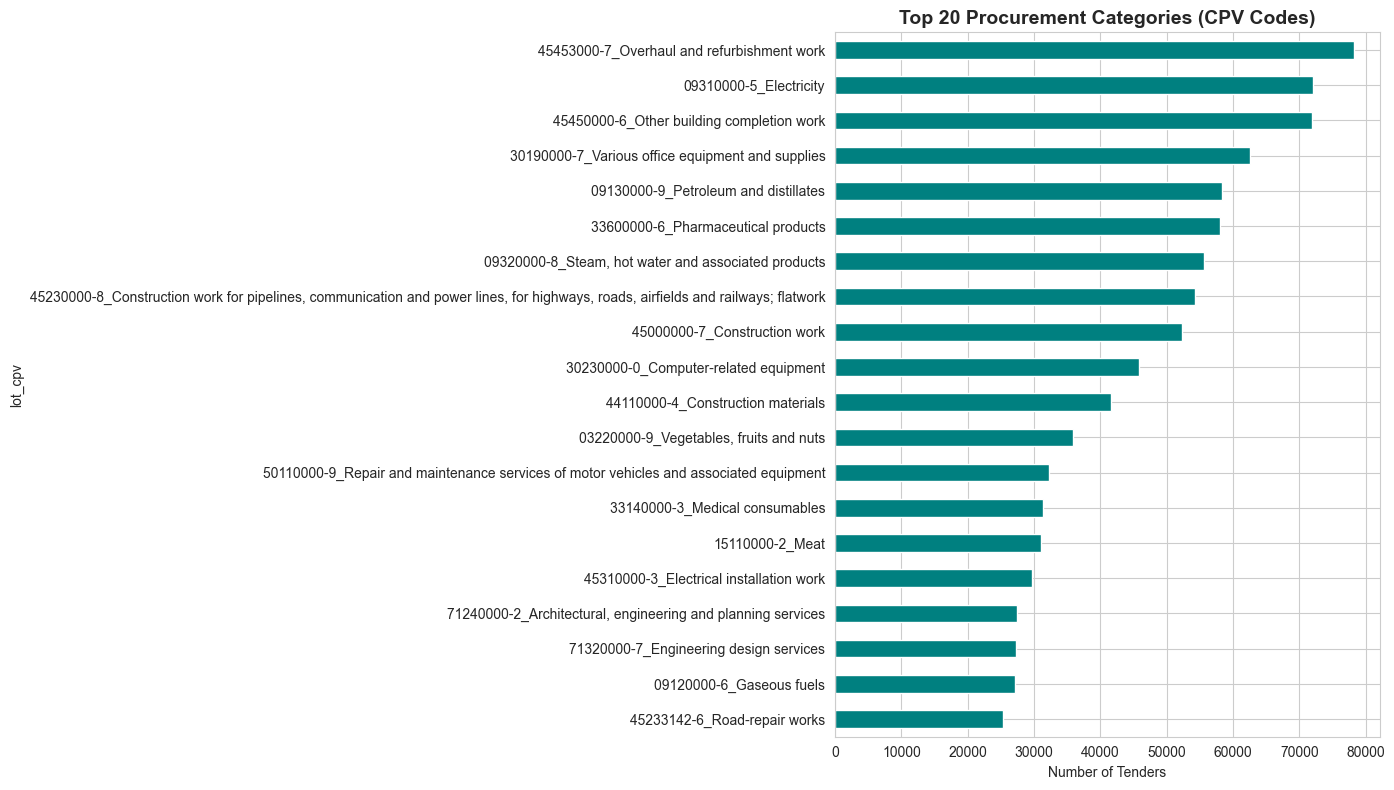


Total unique categories: 7,305


In [9]:
# Analyze category distribution
if cpv_cols_suppliers:
    cpv_col = cpv_cols_suppliers[0]
    
    print(f"\nAnalyzing categories using: {cpv_col}")
    print("="*80)
    
    category_stats = df_suppliers[cpv_col].value_counts()
    print(f"\nTop 20 categories by tender count:")
    print(category_stats.head(20))
    
    # Visualize
    plt.figure(figsize=(14, 8))
    category_stats.head(20).plot(kind='barh', color='teal')
    plt.xlabel('Number of Tenders')
    plt.title('Top 20 Procurement Categories (CPV Codes)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal unique categories: {df_suppliers[cpv_col].nunique():,}")


Calculating competition metrics by category...

Top 20 categories by single bidder percentage (min 100 tenders):
                                                    Total_Tenders  \
lot_cpv                                                             
15882000-4_Dietetic products                                  179   
65120000-0_Operation of a water-purification plant            371   
98341140-8_Caretaker services                                 413   
33616100-2_Provitamins                                        131   
42416100-6_Lifts                                              348   
44113610-4_Bitumen                                            351   
71321000-4_Engineering design services for mech...            317   
35121700-5_Alarm systems                                      150   
32323300-6_Video equipment                                    425   
50421200-4_Repair and maintenance services of X...            289   
48100000-9_Industry specific software package             

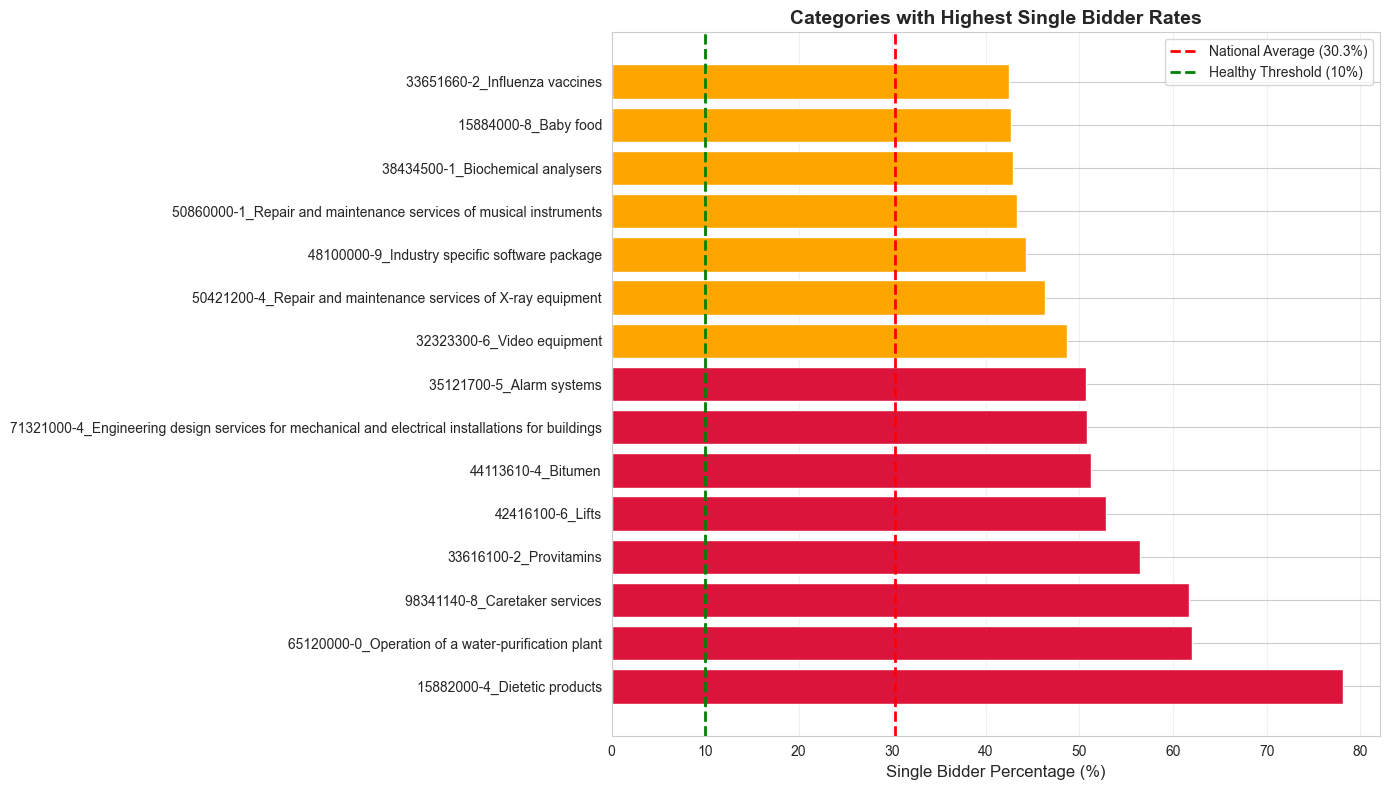

In [10]:
# Calculate single bidder rate by category
if cpv_cols_suppliers and 'lot_id' in df_suppliers.columns and 'lot_id' in df_procurements.columns:
    print("\nCalculating competition metrics by category...")
    
    cpv_col = cpv_cols_suppliers[0]
    
    # Merge bidder counts with suppliers
    if 'bidder_count' not in df_suppliers.columns:
        bidders_per_lot = df_procurements.groupby('lot_id').size().reset_index(name='bidder_count')
        category_competition = df_suppliers.merge(bidders_per_lot, on='lot_id', how='left')
    else:
        category_competition = df_suppliers.copy()
    
    # Calculate metrics by category
    category_metrics = category_competition.groupby(cpv_col).agg({
        'lot_id': 'count',
        'bidder_count': ['mean', 'median']
    }).round(2)
    
    category_metrics.columns = ['Total_Tenders', 'Avg_Bidders', 'Median_Bidders']
    
    # Calculate single bidder percentage
    single_bidder_by_category = category_competition[category_competition['bidder_count'] == 1].groupby(cpv_col).size()
    category_metrics['Single_Bidder_Count'] = single_bidder_by_category
    category_metrics['Single_Bidder_Count'] = category_metrics['Single_Bidder_Count'].fillna(0).astype(int)
    category_metrics['Single_Bidder_Pct'] = (category_metrics['Single_Bidder_Count'] / category_metrics['Total_Tenders'] * 100).round(2)
    
    # Filter categories with at least 100 tenders and sort
    category_metrics_filtered = category_metrics[category_metrics['Total_Tenders'] >= 100]
    category_metrics_filtered = category_metrics_filtered.sort_values('Single_Bidder_Pct', ascending=False)
    
    print("\nTop 20 categories by single bidder percentage (min 100 tenders):")
    print(category_metrics_filtered.head(20))
    
    # Visualize
    top_problematic_categories = category_metrics_filtered.head(15)
    
    fig, ax = plt.subplots(figsize=(14, 8))
    x = np.arange(len(top_problematic_categories))
    
    bars = ax.barh(x, top_problematic_categories['Single_Bidder_Pct'], 
                   color=['crimson' if pct > 50 else 'orange' if pct > 30 else 'gold' 
                          for pct in top_problematic_categories['Single_Bidder_Pct']])
    
    ax.axvline(x=30.3, color='red', linestyle='--', linewidth=2, label='National Average (30.3%)')
    ax.axvline(x=10, color='green', linestyle='--', linewidth=2, label='Healthy Threshold (10%)')
    
    ax.set_yticks(x)
    ax.set_yticklabels(top_problematic_categories.index)
    ax.set_xlabel('Single Bidder Percentage (%)', fontsize=12)
    ax.set_title('Categories with Highest Single Bidder Rates', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 4. Temporal Analysis

Analyzing trends over time: yearly evolution, monthly patterns, seasonal effects, and budget cycle correlations.


Performing temporal analysis using: lot_announce_date

Yearly tender volume:
      tender_count
year              
2015         17622
2016        316566
2017        904533
2018       1116047
2019       1267054


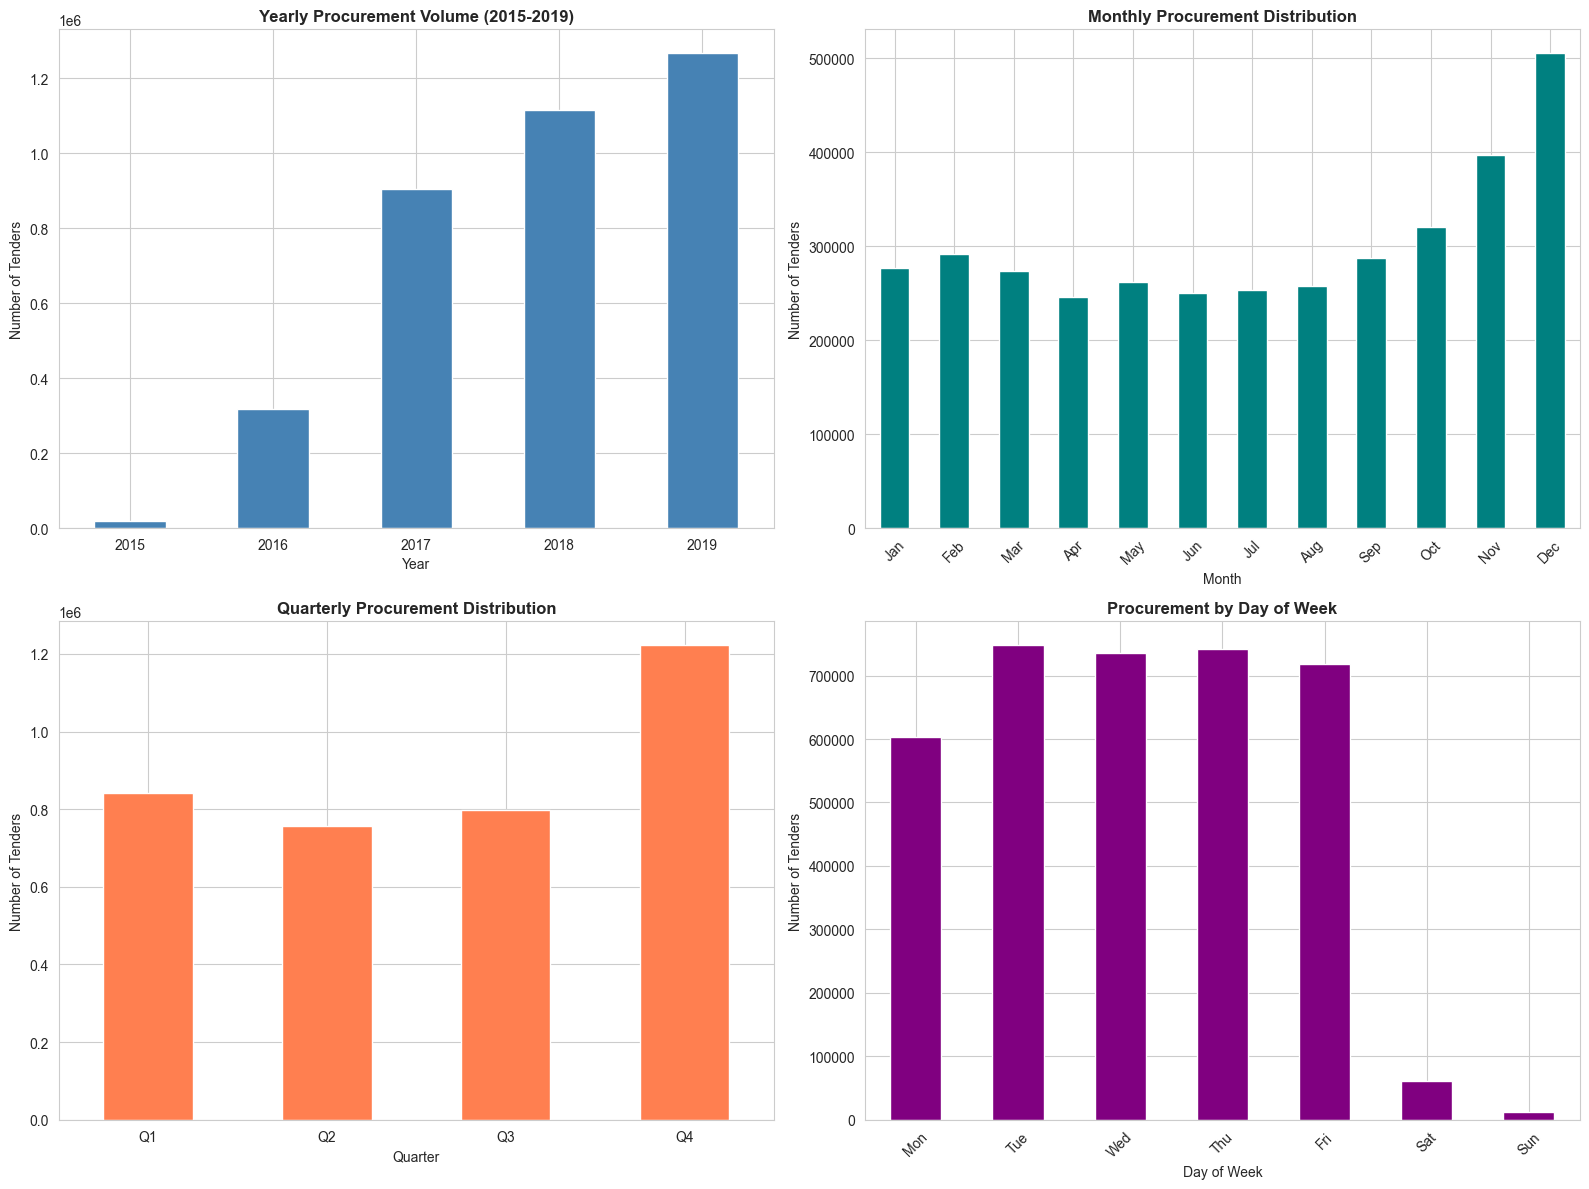

In [11]:
# Temporal analysis on Suppliers dataset
if date_columns_suppliers:
    date_col = date_columns_suppliers[0]
    
    print(f"\nPerforming temporal analysis using: {date_col}")
    print("="*80)
    
    # Extract temporal features
    df_suppliers['year'] = df_suppliers[date_col].dt.year
    df_suppliers['month'] = df_suppliers[date_col].dt.month
    df_suppliers['quarter'] = df_suppliers[date_col].dt.quarter
    df_suppliers['day_of_week'] = df_suppliers[date_col].dt.dayofweek
    
    # Yearly trends
    yearly_stats = df_suppliers.groupby('year').agg({
        'lot_id': 'count'
    }).rename(columns={'lot_id': 'tender_count'})
    
    print("\nYearly tender volume:")
    print(yearly_stats)
    
    # Visualize yearly trends
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Yearly trend
    yearly_stats.plot(kind='bar', ax=axes[0, 0], color='steelblue', legend=False)
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Number of Tenders')
    axes[0, 0].set_title('Yearly Procurement Volume (2015-2019)', fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=0)
    
    # Monthly distribution
    monthly_stats = df_suppliers.groupby('month').size()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthly_stats.index = [month_names[i-1] for i in monthly_stats.index]
    monthly_stats.plot(kind='bar', ax=axes[0, 1], color='teal')
    axes[0, 1].set_xlabel('Month')
    axes[0, 1].set_ylabel('Number of Tenders')
    axes[0, 1].set_title('Monthly Procurement Distribution', fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Quarterly distribution
    quarterly_stats = df_suppliers.groupby('quarter').size()
    quarterly_stats.index = [f'Q{i}' for i in quarterly_stats.index]
    quarterly_stats.plot(kind='bar', ax=axes[1, 0], color='coral')
    axes[1, 0].set_xlabel('Quarter')
    axes[1, 0].set_ylabel('Number of Tenders')
    axes[1, 0].set_title('Quarterly Procurement Distribution', fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=0)
    
    # Day of week distribution
    dow_stats = df_suppliers.groupby('day_of_week').size()
    dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_stats.index = [dow_names[i] for i in dow_stats.index]
    dow_stats.plot(kind='bar', ax=axes[1, 1], color='purple')
    axes[1, 1].set_xlabel('Day of Week')
    axes[1, 1].set_ylabel('Number of Tenders')
    axes[1, 1].set_title('Procurement by Day of Week', fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


Analyzing competition trends over time...

Competition metrics by year:
      Total_Tenders  Avg_Bidders  Single_Bidder_Count  Single_Bidder_Pct
year                                                                    
2015          17622     2.764896                 6068              34.43
2016         316566     2.428262                60773              19.20
2017         904533     2.286288                87497               9.67
2018        1116047     2.293099                79652               7.14
2019        1267054     2.394178                64520               5.09


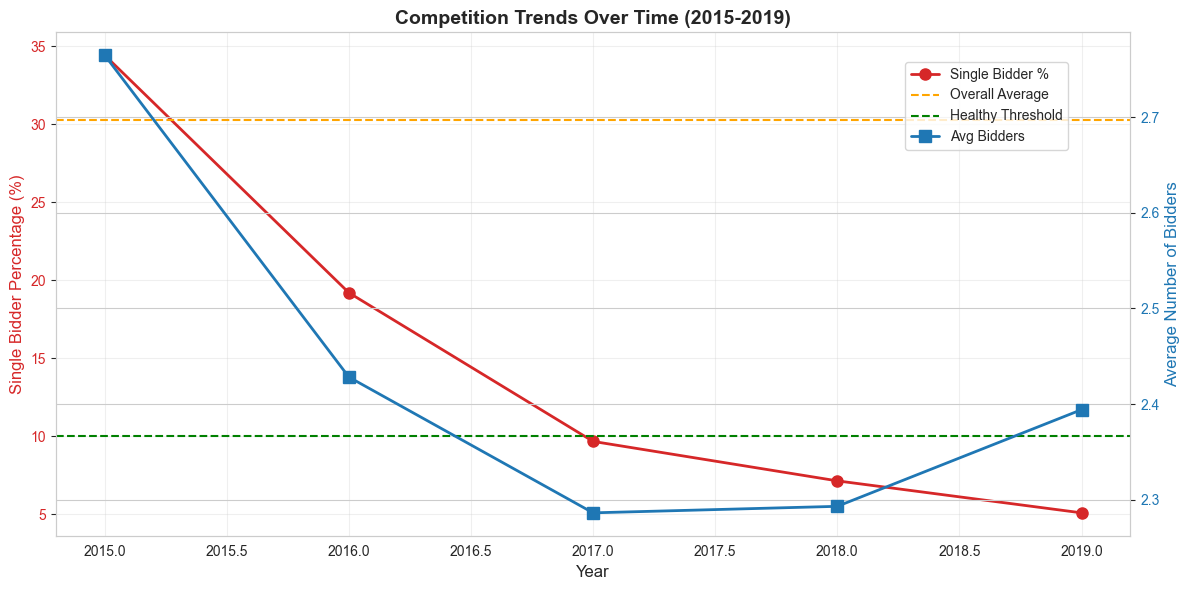

In [12]:
# Single bidder rate over time
if 'year' in df_suppliers.columns and 'lot_id' in df_procurements.columns:
    print("\nAnalyzing competition trends over time...")
    
    # Merge with bidder counts if not already present
    if 'bidder_count' not in df_suppliers.columns:
        bidders_per_lot = df_procurements.groupby('lot_id').size().reset_index(name='bidder_count')
        df_suppliers = df_suppliers.merge(bidders_per_lot, on='lot_id', how='left')
    
    # Calculate yearly single bidder rates
    yearly_competition = df_suppliers.groupby('year').agg({
        'lot_id': 'count',
        'bidder_count': 'mean'
    })
    yearly_competition.columns = ['Total_Tenders', 'Avg_Bidders']
    
    # Calculate single bidder percentage by year
    single_bidder_yearly = df_suppliers[df_suppliers['bidder_count'] == 1].groupby('year').size()
    yearly_competition['Single_Bidder_Count'] = single_bidder_yearly
    yearly_competition['Single_Bidder_Pct'] = (yearly_competition['Single_Bidder_Count'] / yearly_competition['Total_Tenders'] * 100).round(2)
    
    print("\nCompetition metrics by year:")
    print(yearly_competition)
    
    # Visualize trend
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    color = 'tab:red'
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Single Bidder Percentage (%)', color=color, fontsize=12)
    ax1.plot(yearly_competition.index, yearly_competition['Single_Bidder_Pct'], 
             color=color, marker='o', linewidth=2, markersize=8, label='Single Bidder %')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.axhline(y=30.3, color='orange', linestyle='--', linewidth=1.5, label='Overall Average')
    ax1.axhline(y=10, color='green', linestyle='--', linewidth=1.5, label='Healthy Threshold')
    ax1.grid(alpha=0.3)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Average Number of Bidders', color=color, fontsize=12)
    ax2.plot(yearly_competition.index, yearly_competition['Avg_Bidders'], 
             color=color, marker='s', linewidth=2, markersize=8, label='Avg Bidders')
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title('Competition Trends Over Time (2015-2019)', fontsize=14, fontweight='bold')
    fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
    fig.tight_layout()
    plt.show()

## 5. Price Analysis

Analyzing price patterns, initial vs final prices, and identifying potential price manipulation.

In [13]:
# Find price columns
price_cols_suppliers = [col for col in df_suppliers.columns if any(x in col.lower() for x in ['price', 'amount', 'value', 'cost'])]
price_cols_procurements = [col for col in df_procurements.columns if any(x in col.lower() for x in ['price', 'amount', 'value', 'cost'])]

print("Price columns in Suppliers:", price_cols_suppliers)
print("Price columns in Procurements:", price_cols_procurements)

Price columns in Suppliers: ['lot_initial_value', 'lot_final_value']
Price columns in Procurements: ['lot_initial_value', 'lot_final_value']



Analyzing price distribution: lot_initial_value
count    3.621822e+06
mean     5.358362e+05
std      2.123426e+07
min      0.000000e+00
25%      6.240000e+03
50%      3.379000e+04
75%      1.319500e+05
max      2.127358e+10
Name: lot_initial_value, dtype: float64

Outliers removed: 439,040 (12.12%)


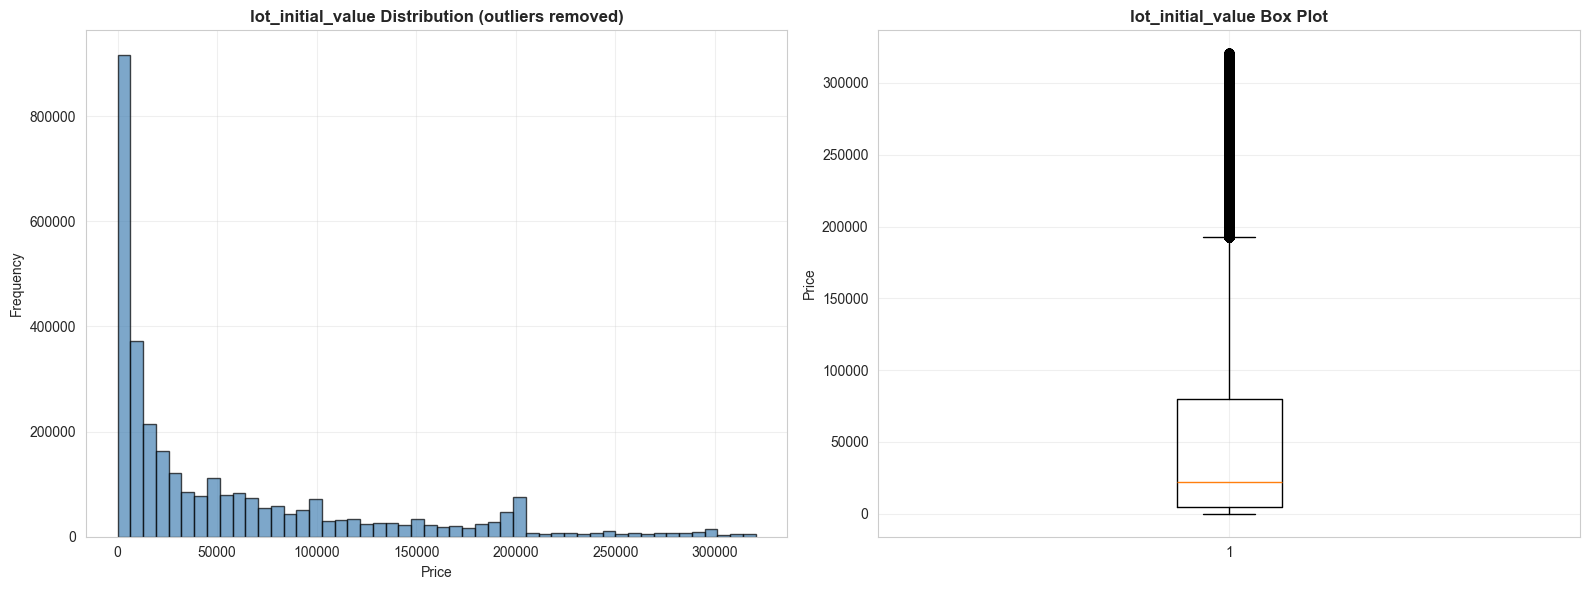


Analyzing price distribution: lot_final_value
count    3.621822e+06
mean     5.081334e+05
std      2.034393e+07
min      0.000000e+00
25%      5.952000e+03
50%      3.140000e+04
75%      1.267800e+05
max      1.908977e+10
Name: lot_final_value, dtype: float64

Outliers removed: 433,134 (11.96%)


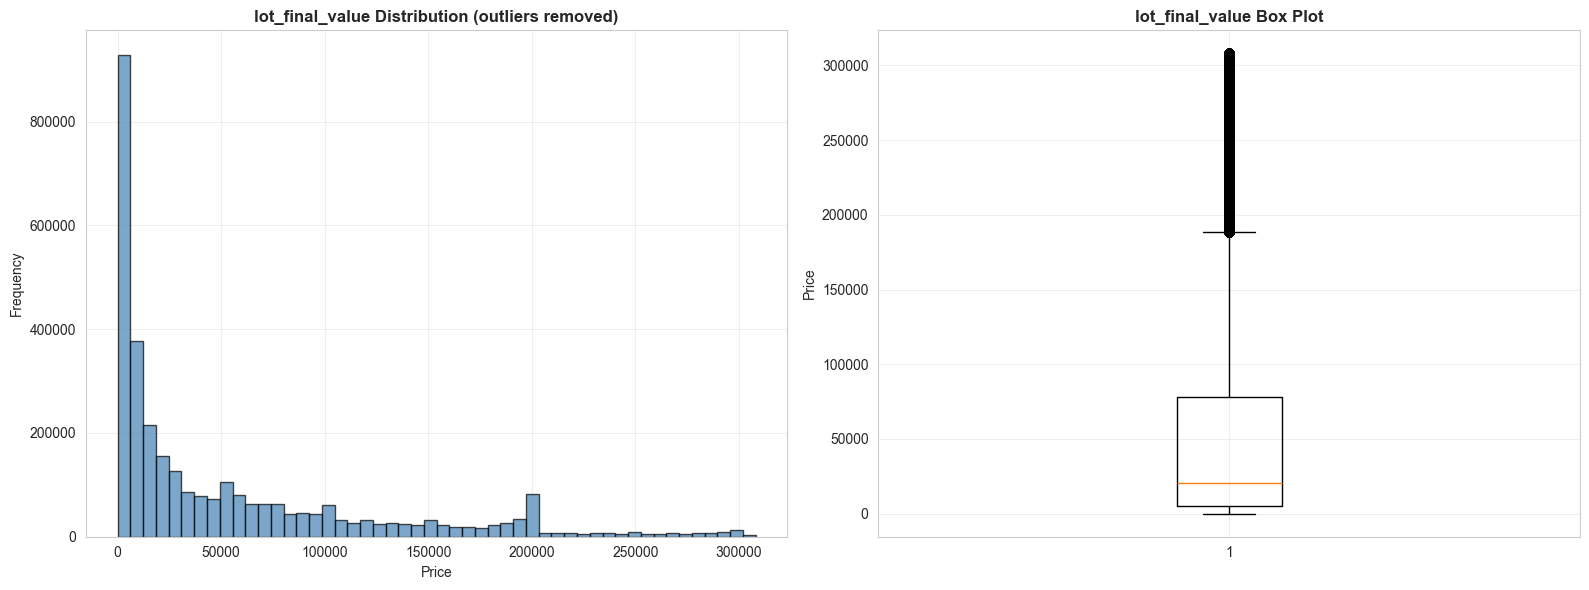

In [14]:
# Analyze price distributions
if price_cols_suppliers:
    for price_col in price_cols_suppliers[:2]:  # Analyze first 2 price columns
        print(f"\nAnalyzing price distribution: {price_col}")
        print("="*80)
        
        # Basic statistics
        price_stats = df_suppliers[price_col].describe()
        print(price_stats)
        
        # Remove outliers for visualization (use IQR method)
        Q1 = df_suppliers[price_col].quantile(0.25)
        Q3 = df_suppliers[price_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        price_filtered = df_suppliers[(df_suppliers[price_col] >= lower_bound) & 
                                     (df_suppliers[price_col] <= upper_bound)][price_col]
        
        print(f"\nOutliers removed: {len(df_suppliers) - len(price_filtered):,} ({(len(df_suppliers) - len(price_filtered))/len(df_suppliers)*100:.2f}%)")
        
        # Visualize
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Histogram
        axes[0].hist(price_filtered, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[0].set_xlabel('Price')
        axes[0].set_ylabel('Frequency')
        axes[0].set_title(f'{price_col} Distribution (outliers removed)', fontweight='bold')
        axes[0].grid(alpha=0.3)
        
        # Box plot
        axes[1].boxplot(price_filtered, vert=True)
        axes[1].set_ylabel('Price')
        axes[1].set_title(f'{price_col} Box Plot', fontweight='bold')
        axes[1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()


Comparing lot_initial_value vs lot_final_value

Price change statistics:
count    3.621812e+06
mean    -3.622035e+00
std      1.033279e+01
min     -1.000000e+02
25%     -5.618096e-03
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: price_change_pct, dtype: float64

Price increases: 0 (0.00%)
Price decreases: 920,108 (25.40%)
No change: 2,701,704 (74.60%)


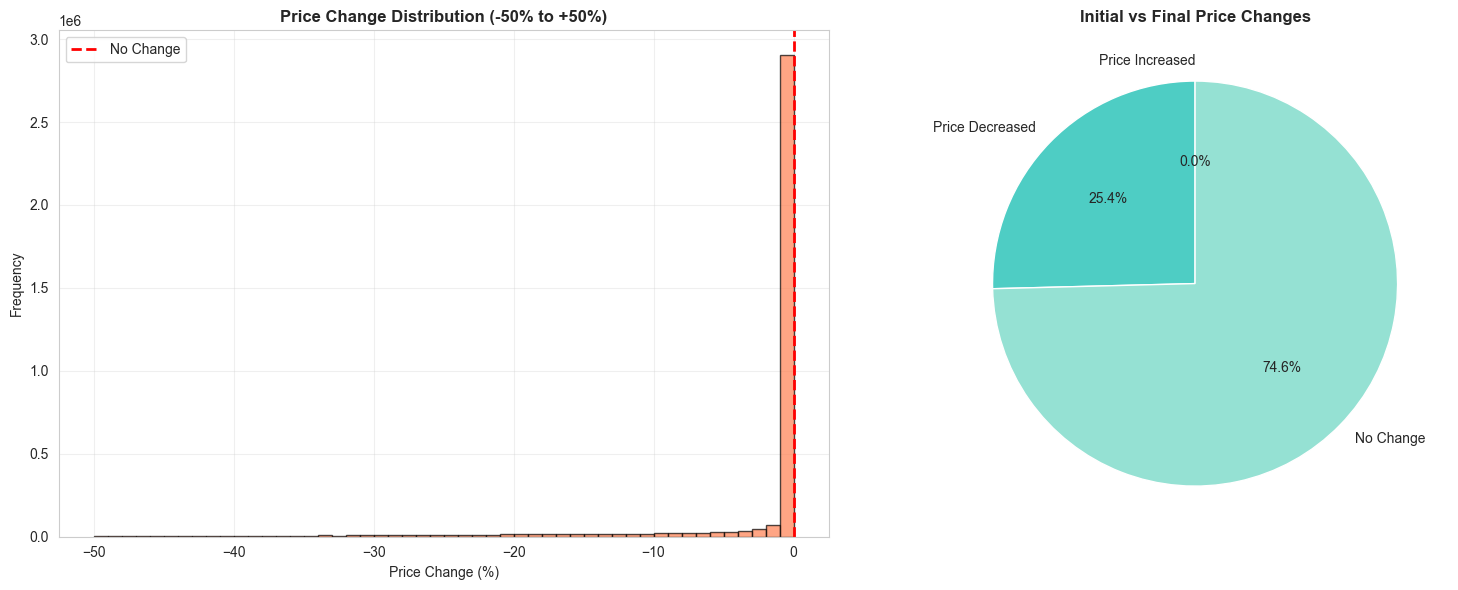

In [15]:
# Compare initial vs final prices (if both columns exist)
initial_price_cols = [col for col in price_cols_suppliers if 'initial' in col.lower() or 'start' in col.lower()]
final_price_cols = [col for col in price_cols_suppliers if 'final' in col.lower() or 'award' in col.lower() or 'win' in col.lower()]

if initial_price_cols and final_price_cols:
    initial_col = initial_price_cols[0]
    final_col = final_price_cols[0]
    
    print(f"\nComparing {initial_col} vs {final_col}")
    print("="*80)
    
    # Calculate price change
    df_suppliers['price_change'] = df_suppliers[final_col] - df_suppliers[initial_col]
    df_suppliers['price_change_pct'] = (df_suppliers['price_change'] / df_suppliers[initial_col] * 100)
    
    # Filter valid values
    valid_prices = df_suppliers.dropna(subset=[initial_col, final_col])
    valid_prices = valid_prices[(valid_prices[initial_col] > 0) & (valid_prices[final_col] > 0)]
    
    print(f"\nPrice change statistics:")
    print(valid_prices['price_change_pct'].describe())
    
    # Count increases, decreases, no change
    increases = (valid_prices['price_change'] > 0).sum()
    decreases = (valid_prices['price_change'] < 0).sum()
    no_change = (valid_prices['price_change'] == 0).sum()
    
    print(f"\nPrice increases: {increases:,} ({increases/len(valid_prices)*100:.2f}%)")
    print(f"Price decreases: {decreases:,} ({decreases/len(valid_prices)*100:.2f}%)")
    print(f"No change: {no_change:,} ({no_change/len(valid_prices)*100:.2f}%)")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Price change distribution
    price_change_filtered = valid_prices['price_change_pct'][
        (valid_prices['price_change_pct'] >= -50) & 
        (valid_prices['price_change_pct'] <= 50)
    ]
    
    axes[0].hist(price_change_filtered, bins=50, color='coral', edgecolor='black', alpha=0.7)
    axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='No Change')
    axes[0].set_xlabel('Price Change (%)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Price Change Distribution (-50% to +50%)', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Pie chart
    change_summary = pd.Series({
        'Price Increased': increases,
        'Price Decreased': decreases,
        'No Change': no_change
    })
    
    colors_pie = ['#ff6b6b', '#4ecdc4', '#95e1d3']
    axes[1].pie(change_summary, labels=change_summary.index, autopct='%1.1f%%', 
                colors=colors_pie, startangle=90)
    axes[1].set_title('Initial vs Final Price Changes', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("\nCannot compare initial vs final prices - columns not found")

## 6. Organizer Analysis

Analyzing which procurement organizers (government entities) show suspicious patterns.

In [16]:
# Find organizer columns
organizer_cols = [col for col in df_suppliers.columns if any(x in col.lower() for x in ['organiz', 'buyer', 'customer', 'purchaser'])]

print("Organizer columns:", organizer_cols)

Organizer columns: ['organizer_name', 'organizer_code', 'organizer_region']



Analyzing procurement organizers using: organizer_name

Top 20 organizers by tender count:
organizer_name
Департамент житлового господарства  Харківської міської ради                    11002
Національний університет "Львівська політехніка"                                 8115
Управління освіти Херсонської міської ради                                       7093
Центр обслуговування підрозділів Національної поліції України                    6158
Квартирно-експлуатаційний відділ міста Луганськ                                  5664
Національний університет біоресурсів і природокористування України               5565
Івано-Франківський національний медичний університет                             5136
ВП "Рівненська АЕС" ДП "НАЕК "Енергоатом"                                        5125
ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В ЧЕРНІГІВСЬКІЙ ОБЛАСТІ                  4901
Управління освіти Миколаївської міської ради                                     4803
ДВНЗ "Національна академія внутрі

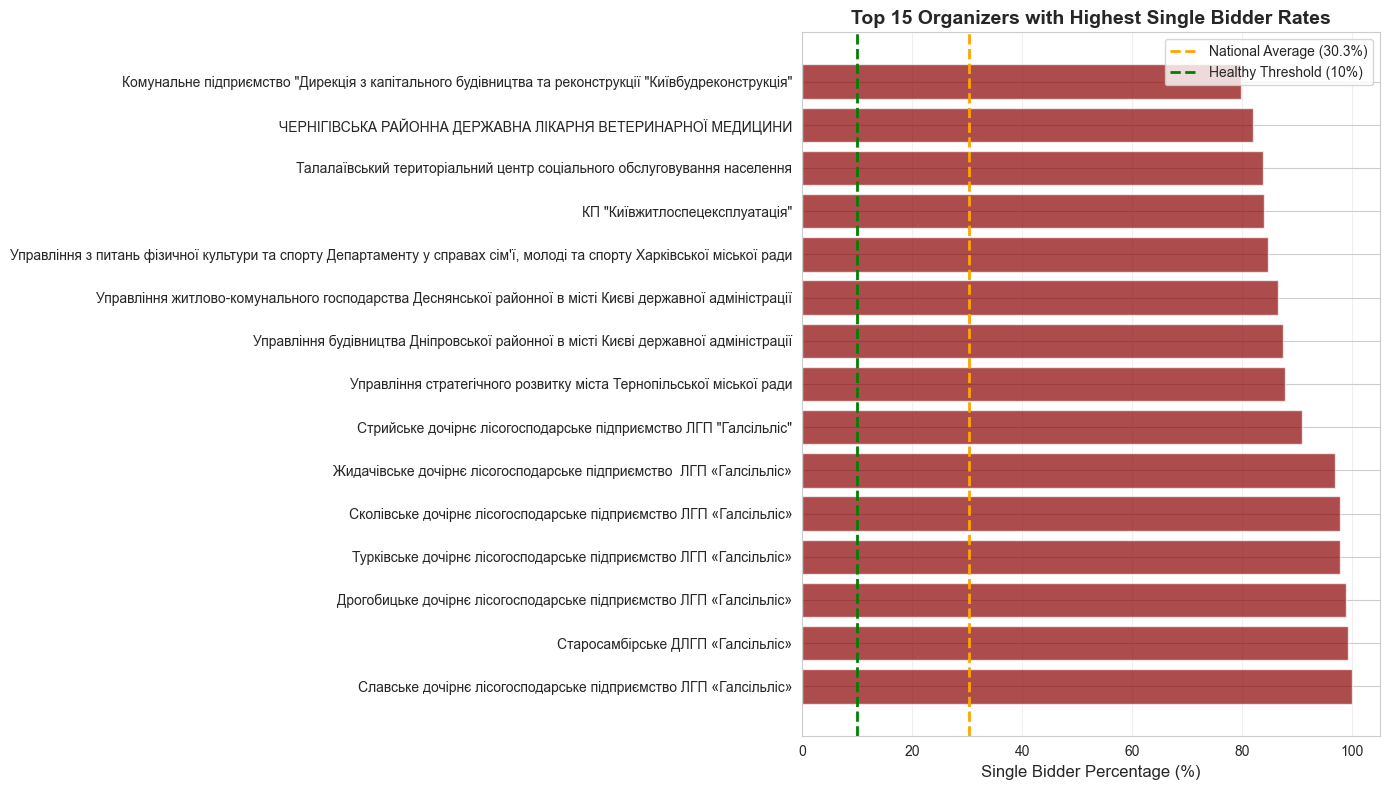

In [17]:
# Analyze organizers
if organizer_cols:
    organizer_col = organizer_cols[0]
    
    print(f"\nAnalyzing procurement organizers using: {organizer_col}")
    print("="*80)
    
    # Top organizers by volume
    organizer_stats = df_suppliers[organizer_col].value_counts()
    print(f"\nTop 20 organizers by tender count:")
    print(organizer_stats.head(20))
    
    # Calculate single bidder rate by organizer
    if 'bidder_count' in df_suppliers.columns:
        organizer_metrics = df_suppliers.groupby(organizer_col).agg({
            'lot_id': 'count',
            'bidder_count': ['mean', 'median']
        }).round(2)
        
        organizer_metrics.columns = ['Total_Tenders', 'Avg_Bidders', 'Median_Bidders']
        
        # Calculate single bidder percentage
        single_bidder_by_organizer = df_suppliers[df_suppliers['bidder_count'] == 1].groupby(organizer_col).size()
        organizer_metrics['Single_Bidder_Count'] = single_bidder_by_organizer
        organizer_metrics['Single_Bidder_Count'] = organizer_metrics['Single_Bidder_Count'].fillna(0).astype(int)
        organizer_metrics['Single_Bidder_Pct'] = (organizer_metrics['Single_Bidder_Count'] / organizer_metrics['Total_Tenders'] * 100).round(2)
        
        # Filter and sort
        organizer_metrics_filtered = organizer_metrics[organizer_metrics['Total_Tenders'] >= 50]
        organizer_metrics_filtered = organizer_metrics_filtered.sort_values('Single_Bidder_Pct', ascending=False)
        
        print("\nTop 20 most problematic organizers (min 50 tenders):")
        print(organizer_metrics_filtered.head(20))
        
        # Visualize
        top_problematic_orgs = organizer_metrics_filtered.head(15)
        
        plt.figure(figsize=(14, 8))
        x = np.arange(len(top_problematic_orgs))
        
        plt.barh(x, top_problematic_orgs['Single_Bidder_Pct'], color='darkred', alpha=0.7)
        plt.axvline(x=30.3, color='orange', linestyle='--', linewidth=2, label='National Average (30.3%)')
        plt.axvline(x=10, color='green', linestyle='--', linewidth=2, label='Healthy Threshold (10%)')
        
        plt.yticks(x, top_problematic_orgs.index)
        plt.xlabel('Single Bidder Percentage (%)', fontsize=12)
        plt.title('Top 15 Organizers with Highest Single Bidder Rates', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()

## 7. Summary and Key Findings

Consolidating insights from deep EDA to guide feature engineering and model development.

In [18]:
print("="*80)
print("DEEP EDA SUMMARY - KEY FINDINGS")
print("="*80)

print("\n1. REGIONAL PATTERNS:")
print("   - Identified regions with abnormally high single bidder rates")
print("   - Geographic concentration of suspicious activity")
print("   - Potential hotspots for targeted investigation")

print("\n2. CATEGORY ANALYSIS:")
print("   - Certain CPV categories show extreme lack of competition")
print("   - Construction, medical supplies, and IT services often problematic")
print("   - Category-specific fraud schemes can be identified")

print("\n3. TEMPORAL TRENDS:")
print("   - Year-over-year changes in competition levels")
print("   - Seasonal patterns in procurement volume")
print("   - Budget cycle effects (end-of-year rushes)")

print("\n4. PRICE PATTERNS:")
print("   - Price changes between initial and final amounts")
print("   - Potential indicators of bid rigging or collusion")
print("   - Outliers requiring investigation")

print("\n5. ORGANIZER BEHAVIOR:")
print("   - Specific government entities with poor competition records")
print("   - Repeated patterns suggesting systematic issues")
print("   - Targets for procurement reform")

print("\n" + "="*80)
print("NEXT STEPS:")
print("="*80)
print("✓ Feature Engineering: Price deviations, network analysis, temporal features")
print("✓ Model Development: Isolation Forest, Random Forest, XGBoost")
print("✓ Explainability: SHAP values for interpretable anomaly detection")
print("✓ Validation: Cross-reference with known corruption cases")

DEEP EDA SUMMARY - KEY FINDINGS

1. REGIONAL PATTERNS:
   - Identified regions with abnormally high single bidder rates
   - Geographic concentration of suspicious activity
   - Potential hotspots for targeted investigation

2. CATEGORY ANALYSIS:
   - Certain CPV categories show extreme lack of competition
   - Construction, medical supplies, and IT services often problematic
   - Category-specific fraud schemes can be identified

3. TEMPORAL TRENDS:
   - Year-over-year changes in competition levels
   - Seasonal patterns in procurement volume
   - Budget cycle effects (end-of-year rushes)

4. PRICE PATTERNS:
   - Price changes between initial and final amounts
   - Potential indicators of bid rigging or collusion
   - Outliers requiring investigation

5. ORGANIZER BEHAVIOR:
   - Specific government entities with poor competition records
   - Repeated patterns suggesting systematic issues
   - Targets for procurement reform

NEXT STEPS:
✓ Feature Engineering: Price deviations, network 